In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Import données

In [2]:
df_ACE = pd.read_csv(os.path.join(r"champs-elysees.csv"), sep=";")
df_Sts = pd.read_csv(os.path.join(r"Sts.csv"), sep=";")
df_convention = pd.read_csv(os.path.join(r"convention.csv"), sep=";")


(df_ACE, df_Sts, df_convention)
tagg = ["Champs Elysées", "Sts-Pères", "Convention"]

def clean_date(date):
    date = re.sub('T', ' ', date)
    date=date[:-6]
    return date

for df in (df_ACE, df_Sts, df_convention):
    df['Date et heure de comptage'] = df['Date et heure de comptage'].apply(lambda s : clean_date(s))


#Nous adaptons notre features "Date" au format d'une série temporelle
for df in (df_ACE, df_Sts, df_convention):
    df['Date et heure de comptage']= pd.to_datetime(df["Date et heure de comptage"], format='%Y-%m-%d %H:%M:%S')
 
    
for df in (df_ACE, df_Sts, df_convention):
    df.sort_values("Date et heure de comptage",inplace = True)

#Nous indiquons que la série temporelle est indexée selon la date
df_ACE = df_ACE.set_index('Date et heure de comptage')
df_convention = df_convention.set_index('Date et heure de comptage')
df_Sts = df_Sts.set_index('Date et heure de comptage')
    
#Nous créons plusieurs colonnes permettant de situer la donnée par jour/mois/année. Cela nous servira pa la suite pour traiter
#la données selon différentes échelles temporelles.
df_ACE['Year'] = df_ACE.index.year
df_ACE['Month'] = df_ACE.index.month
df_ACE['Weekday Name'] = df_ACE.index.weekday
df_ACE['Hour'] = df_ACE.index.hour

df_convention['Year'] = df_convention.index.year
df_convention['Month'] = df_convention.index.month
df_convention['Weekday Name'] = df_convention.index.weekday
df_convention['Hour'] = df_convention.index.hour

df_Sts['Year'] = df_Sts.index.year
df_Sts['Month'] = df_Sts.index.month
df_Sts['Weekday Name'] = df_Sts.index.weekday
df_Sts['Hour'] = df_Sts.index.hour

df_Sts.head()

,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,Year,Month,Weekday Name,Hour
Date et heure de comptage,,,,,,,,,,,,,,,,,,
2019-11-01 04:00:00,5662,Convention,323.0,1.20611,Fluide,2968,Convention-Felix_Faure,2969,Convention-Croix_Nivert,Invalide,2005-01-01,2019-06-01,"48.8405343369,2.28910566697","{""type"": ""LineString"", ""coordinates"": [[2.2879...",2019,11,4,4
2019-11-01 04:00:00,5659,Convention,187.0,1.63333,Fluide,2967,Convention-Lourmel,2966,Convention-St_Charles,Invalide,2005-01-01,2019-06-01,"48.8428042482,2.2842353941","{""type"": ""LineString"", ""coordinates"": [[2.2856...",2019,11,4,4
2019-11-01 04:00:00,5660,Convention,116.0,1.24445,Fluide,2967,Convention-Lourmel,2968,Convention-Felix_Faure,Invalide,2005-01-01,2019-06-01,"48.8410899245,2.28786733","{""type"": ""LineString"", ""coordinates"": [[2.2878...",2019,11,4,4
2019-11-01 04:00:00,5677,Convention,NaN,NaN,Inconnu,2974,Convention-Olivier_de_Serres,2914,Convention-Vaugirard,Invalide,2005-01-01,2019-06-01,"48.836994466,2.29718074341","{""type"": ""LineString"", ""coordinates"": [[2.2979...",2019,11,4,4
2019-11-01 04:00:00,5657,Convention,187.0,4.72500,Fluide,2966,Convention-St_Charles,2965,Convention-Gutemberg,Invalide,2005-01-01,2019-06-01,"48.8437916189,2.28203101947","{""type"": ""LineString"", ""coordinates"": [[2.2828...",2019,11,4,4


# Création de DF pour débit et taux d'occupation

<AxesSubplot:xlabel='Date et heure de comptage'>

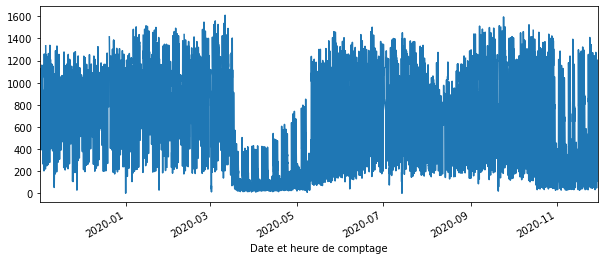

In [3]:
data= pd.DataFrame()
data['debit'] = df_ACE['Débit horaire']
data['taux'] = df_ACE["Taux d'occupation"]
data = data.set_index(df_ACE.index)
data.debit.plot(figsize=(10,4))

In [4]:
data.debit.isna().sum()

77

# Filling missing values with rolling mean, window = 3h

In [5]:
def fill_with_AR(df, column):
    '''Fills missing values in column with rolling mean. Creates column "filled_debit" or "filled_taux"'''
    y = df[column].rolling(10, center=True, min_periods=1).mean()
    if column == 'debit':
        name = column
    else:
        name = 'taux'
    df['filled_'+name] = y
    df['filled_'+name].update(df[column])

fill_with_AR(data, 'debit')
fill_with_AR(data, 'taux')

data.filled_debit.fillna(method='ffill', inplace=True)
data.filled_taux.fillna(method='ffill', inplace=True)

    

# Debit horaire et moyenne mobile, fenêtre = 24h

In [8]:
y = data.filled_debit.rolling(24, center=True, min_periods=1).mean()
# data['debit'].rolling(3).mean()

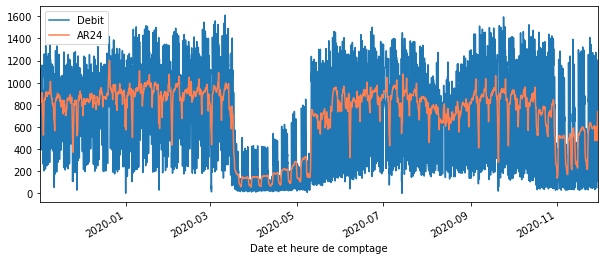

In [9]:
data.filled_debit.plot(figsize=(10,4), label = 'Debit')
y.plot(figsize=(10,4), color='coral', label = 'AR24')
plt.legend()
plt.show()

# Taux d'occupation et moyenne mobile, fenêtre = 24h

In [10]:
z = data.filled_taux.rolling(24, center=True).mean()

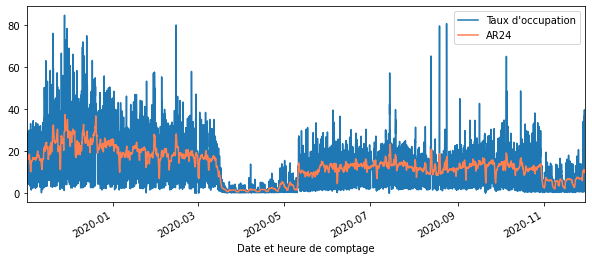

In [11]:
data.filled_taux.plot(figsize=(10,4), label = "Taux d'occupation")
z.plot(figsize=(10,4), color='coral', label = 'AR24')
plt.legend()
plt.show()

# Tests avec modèles ARIMA 

In [12]:
from statsmodels.tsa.arima.model import ARIMA

## 1. Decomposition débit

In [13]:
data = data.asfreq('H', method= 'ffill')

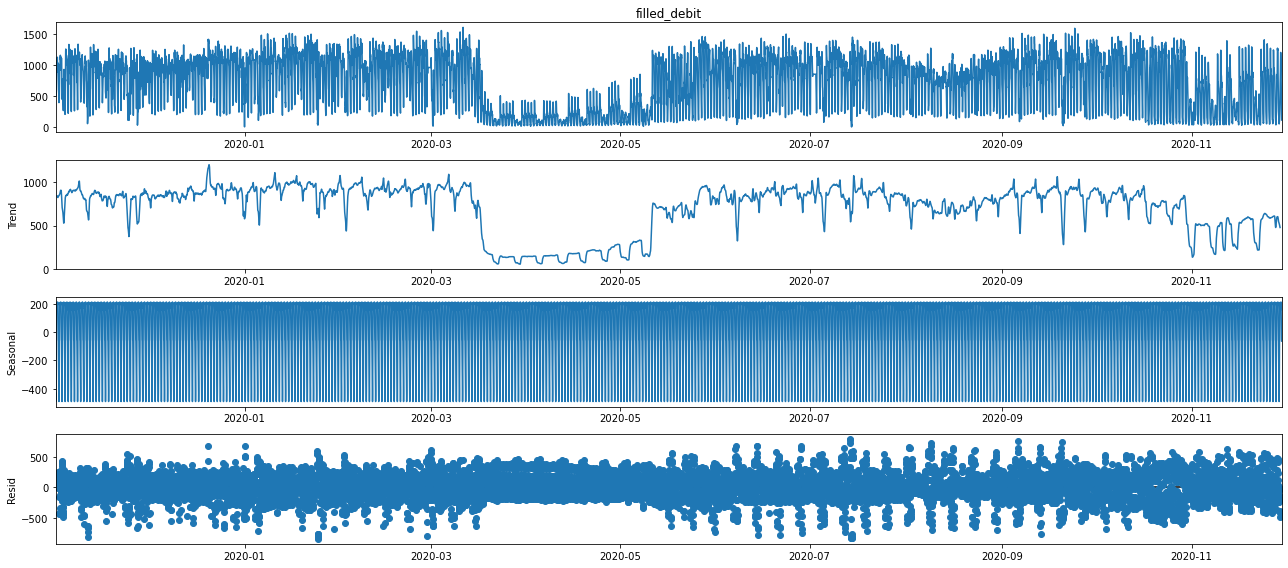

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pylab import rcParams
# data = data.set_index(data.date)
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data.filled_debit, model='additive')
fig = decomposition.plot()
plt.show()

# Tentative avec modèle (2,1,4)(2,1,4,24)

In [ ]:
p,q,d=2,1,4
seasonal = (2,1,4,24)

In [18]:
from datetime import datetime
a = datetime.strptime('2020-11-22 23:00:00', '%Y-%m-%d %H:%M:%S')
b = datetime.strptime('2020-11-27 23:00:00', '%Y-%m-%d %H:%M:%S')
X =data.loc['2020-11-01':'2020-11-22'].filled_debit

Timestamp('2020-11-22 23:00:00', freq='H')

In [19]:
print('Debut et fin',X.index[0],X.index[-1])

Timestamp('2020-11-01 00:00:00', freq='H')

## Model fitting (temps = 143s pour Carlos)

In [154]:
s = time.time()
mod = sm.tsa.statespace.SARIMAX(X,order=(p,q,d),seasonal_order=seasonal,enforce_stationarity=False,enforce_invertibility=False)
model = mod.fit()
pred = model.predict(start=a,end=b)
e = time.time()
print(e-s)

C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


143.1440658569336


## Plotting predictions

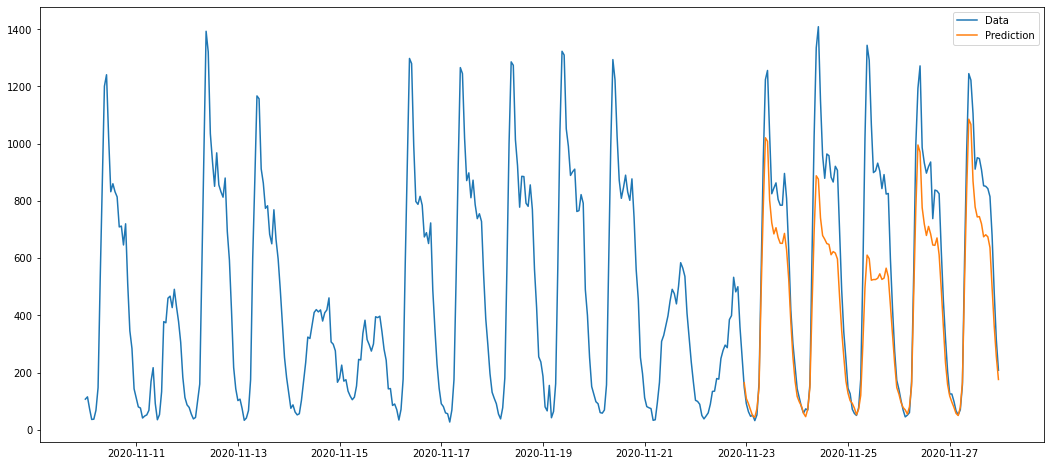

In [157]:
plt.plot(data.loc['2020-11-10':'2020-11-27'].filled_debit, label='Data')
plt.plot(pred, label='Prediction')
plt.legend()
plt.show()


# Grid search of parameters

In [20]:
from sklearn.metrics import mean_squared_error
p = range(1,6)
d = range(1,2)
q = range(1,6)
p2 = range(1,5)
d2 = range(1,2)
q2 = range(1,5)
s = range(24,25)
pdq = list(itertools.product(p, d, q))
p2d2q2 = list(itertools.product(p2, d2, q2, s))

## Grid search (temps = 12h10 pour Carlos)

In [26]:
import time
from tqdm import tqdm

s = time.time()
aic_values = {}
bic_values = {}
MSE_values = {}
for param in tqdm(pdq):
    for param_seasonal in p2d2q2:
        try:
            mod = sm.tsa.statespace.SARIMAX(X,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            aic_score = results.aic
            bic_score = results.bic
            f = datetime.strptime('2020-11-01 00:00:00', '%Y-%m-%d %H:%M:%S')
            ff = datetime.strptime('2020-11-22 23:00:00', '%Y-%m-%d %H:%M:%S')
            aic_values[str(param)+str(param_seasonal)] = aic_score
            bic_values[str(param)+str(param_seasonal)] = bic_score
            MSE_values[str(param)+str(param_seasonal)] = mean_squared_error(X, results.predict(start=f ,end=ff))
        except: 
            continue
e = time.time()
print(e-s)

  0%|                                                                                           | 0/25 [00:00<?, ?it/s]C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
  4%|███▏                                                                            | 1/25 [12:03<4:49:35, 723.97s/it]C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
 48%|████████████████████████████████████▍                                       | 12/25 [4:08:23<5:11:40, 1438.53s/it]C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.p

C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
100%|█████████████████████████████████████████████████████████████████████████████| 25/25 [12:11:25<00:00, 1755.41s/it]

43885.33338499069


# Découverte des résultats

In [53]:
L1,L2,L3,L4 = [],[],[],[]
for mod in aic_values.keys():
    L1.append(mod)
    aic_score = aic_values[mod]
    bic_score = bic_values[mod]
    rmse_score = np.sqrt(MSE_values[mod])
    L2.append(aic_score)
    L3.append(bic_score)
    L4.append(rmse_score)

model_results = pd.DataFrame()
model_results['model'] = L1
model_results['aic'] = L2
model_results['bic'] = L3
model_results['rmse'] = L4

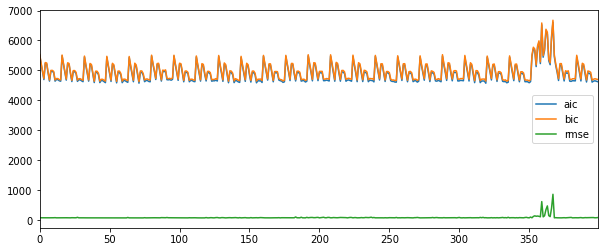

In [54]:
model_results.aic.plot(figsize=(10,4))
model_results.bic.plot(figsize=(10,4))
model_results.rmse.plot(figsize=(10,4))
plt.legend()

<AxesSubplot:>

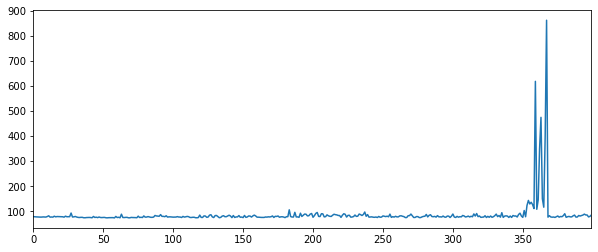

In [55]:
model_results.rmse.plot(figsize=(10,4))

# Modèles triés: AIC croissant

In [58]:
sort_aic = model_results.sort_values(by = 'aic')
sort_aic.head(10)

,model,aic,bic,rmse
319,"(4, 1, 5)(4, 1, 4, 24)",4571.447240,4643.338545,80.727282
71,"(1, 1, 5)(2, 1, 4, 24)",4572.748539,4624.670038,74.554132
55,"(1, 1, 4)(2, 1, 4, 24)",4583.755179,4631.712604,74.125645
155,"(2, 1, 5)(3, 1, 4, 24)",4585.374943,4645.284364,80.271609
334,"(5, 1, 1)(4, 1, 3, 24)",4586.713876,4642.664205,75.969254


# Modèles triés: BIC croissant

In [59]:
sort_bic = model_results.sort_values(by = 'bic')
sort_bic.head()

,model,aic,bic,rmse
71,"(1, 1, 5)(2, 1, 4, 24)",4572.748539,4624.670038,74.554132
55,"(1, 1, 4)(2, 1, 4, 24)",4583.755179,4631.712604,74.125645
39,"(1, 1, 3)(2, 1, 4, 24)",4594.153515,4638.141817,74.644922
135,"(2, 1, 4)(2, 1, 4, 24)",4588.494964,4640.448841,80.099571
43,"(1, 1, 3)(3, 1, 4, 24)",4593.161849,4641.149088,78.764987


# Modèles triés: RMSE croissant

In [60]:
sort_rmse = model_results.sort_values(by = 'rmse')
sort_rmse.head()

,model,aic,bic,rmse
58,"(1, 1, 4)(3, 1, 3, 24)",4851.437306,4900.090578,72.998582
53,"(1, 1, 4)(2, 1, 2, 24)",5149.253020,5190.345495,73.365021
69,"(1, 1, 5)(2, 1, 2, 24)",5138.230065,5183.407317,73.384977
52,"(1, 1, 4)(2, 1, 1, 24)",5199.648368,5236.711243,73.501150
68,"(1, 1, 5)(2, 1, 1, 24)",5199.796466,5240.977438,73.502423


# Fitting model (1,1,5)(2,1,4,24)

In [70]:
from datetime import datetime

a = datetime.strptime('2020-11-22 23:00:00', '%Y-%m-%d %H:%M:%S')
b = datetime.strptime('2020-11-27 23:00:00', '%Y-%m-%d %H:%M:%S')
X =data.loc['2020-11-01':'2020-11-22'].filled_debit

In [71]:
p,d,q = 2,1,4
seasonal = (2,1,4,24)
mod = sm.tsa.statespace.SARIMAX(X,order=(p,q,d),seasonal_order=seasonal,enforce_stationarity=False,enforce_invertibility=False)
model = mod.fit()
pred = model.predict(start=a,end=b)

C:\Users\carlo\Anaconda3\envs\datathon\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


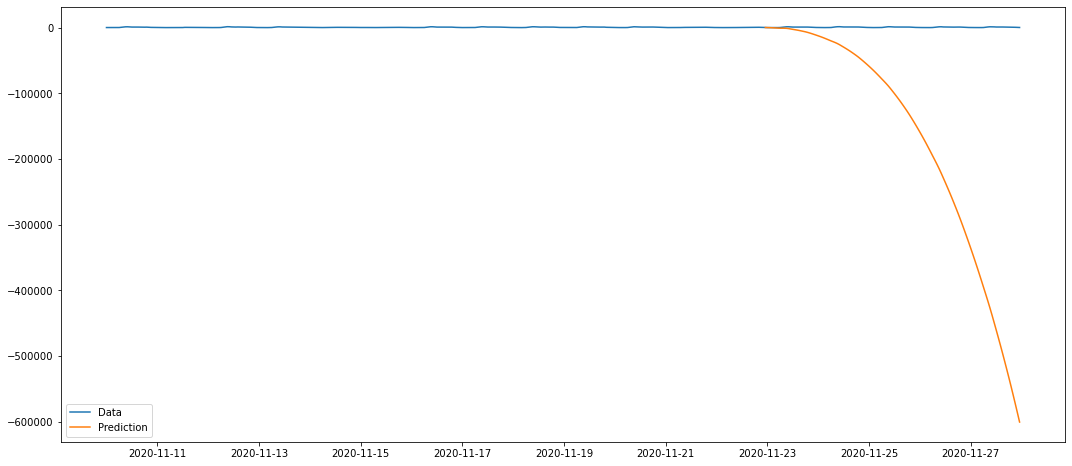

In [72]:
plt.plot(data.loc['2020-11-10':'2020-11-27'].filled_debit, label='Data')
plt.plot(pred, label='Prediction')
plt.legend()
plt.show()